In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [64]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

print('Датасет для обучения: ')
print(df_train.info())
print('Датасет для тестирования: ')
print(df_test.info())

Датасет для обучения: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null 

In [65]:
print(df_train.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [66]:
print('До удаления пустых значений:', len(df_train))
df_train = df_train.dropna()
print('После: ', len(df_train))

До удаления пустых значений: 2000
После:  2000


In [67]:
numeric_cols = df_train.columns.drop(['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi',
                              'price_range',
                              ])
print(numeric_cols)
categoric_cols = df_train.columns.drop(numeric_cols)
print(categoric_cols)

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time'],
      dtype='object')
Index(['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen',
       'wifi', 'price_range'],
      dtype='object')


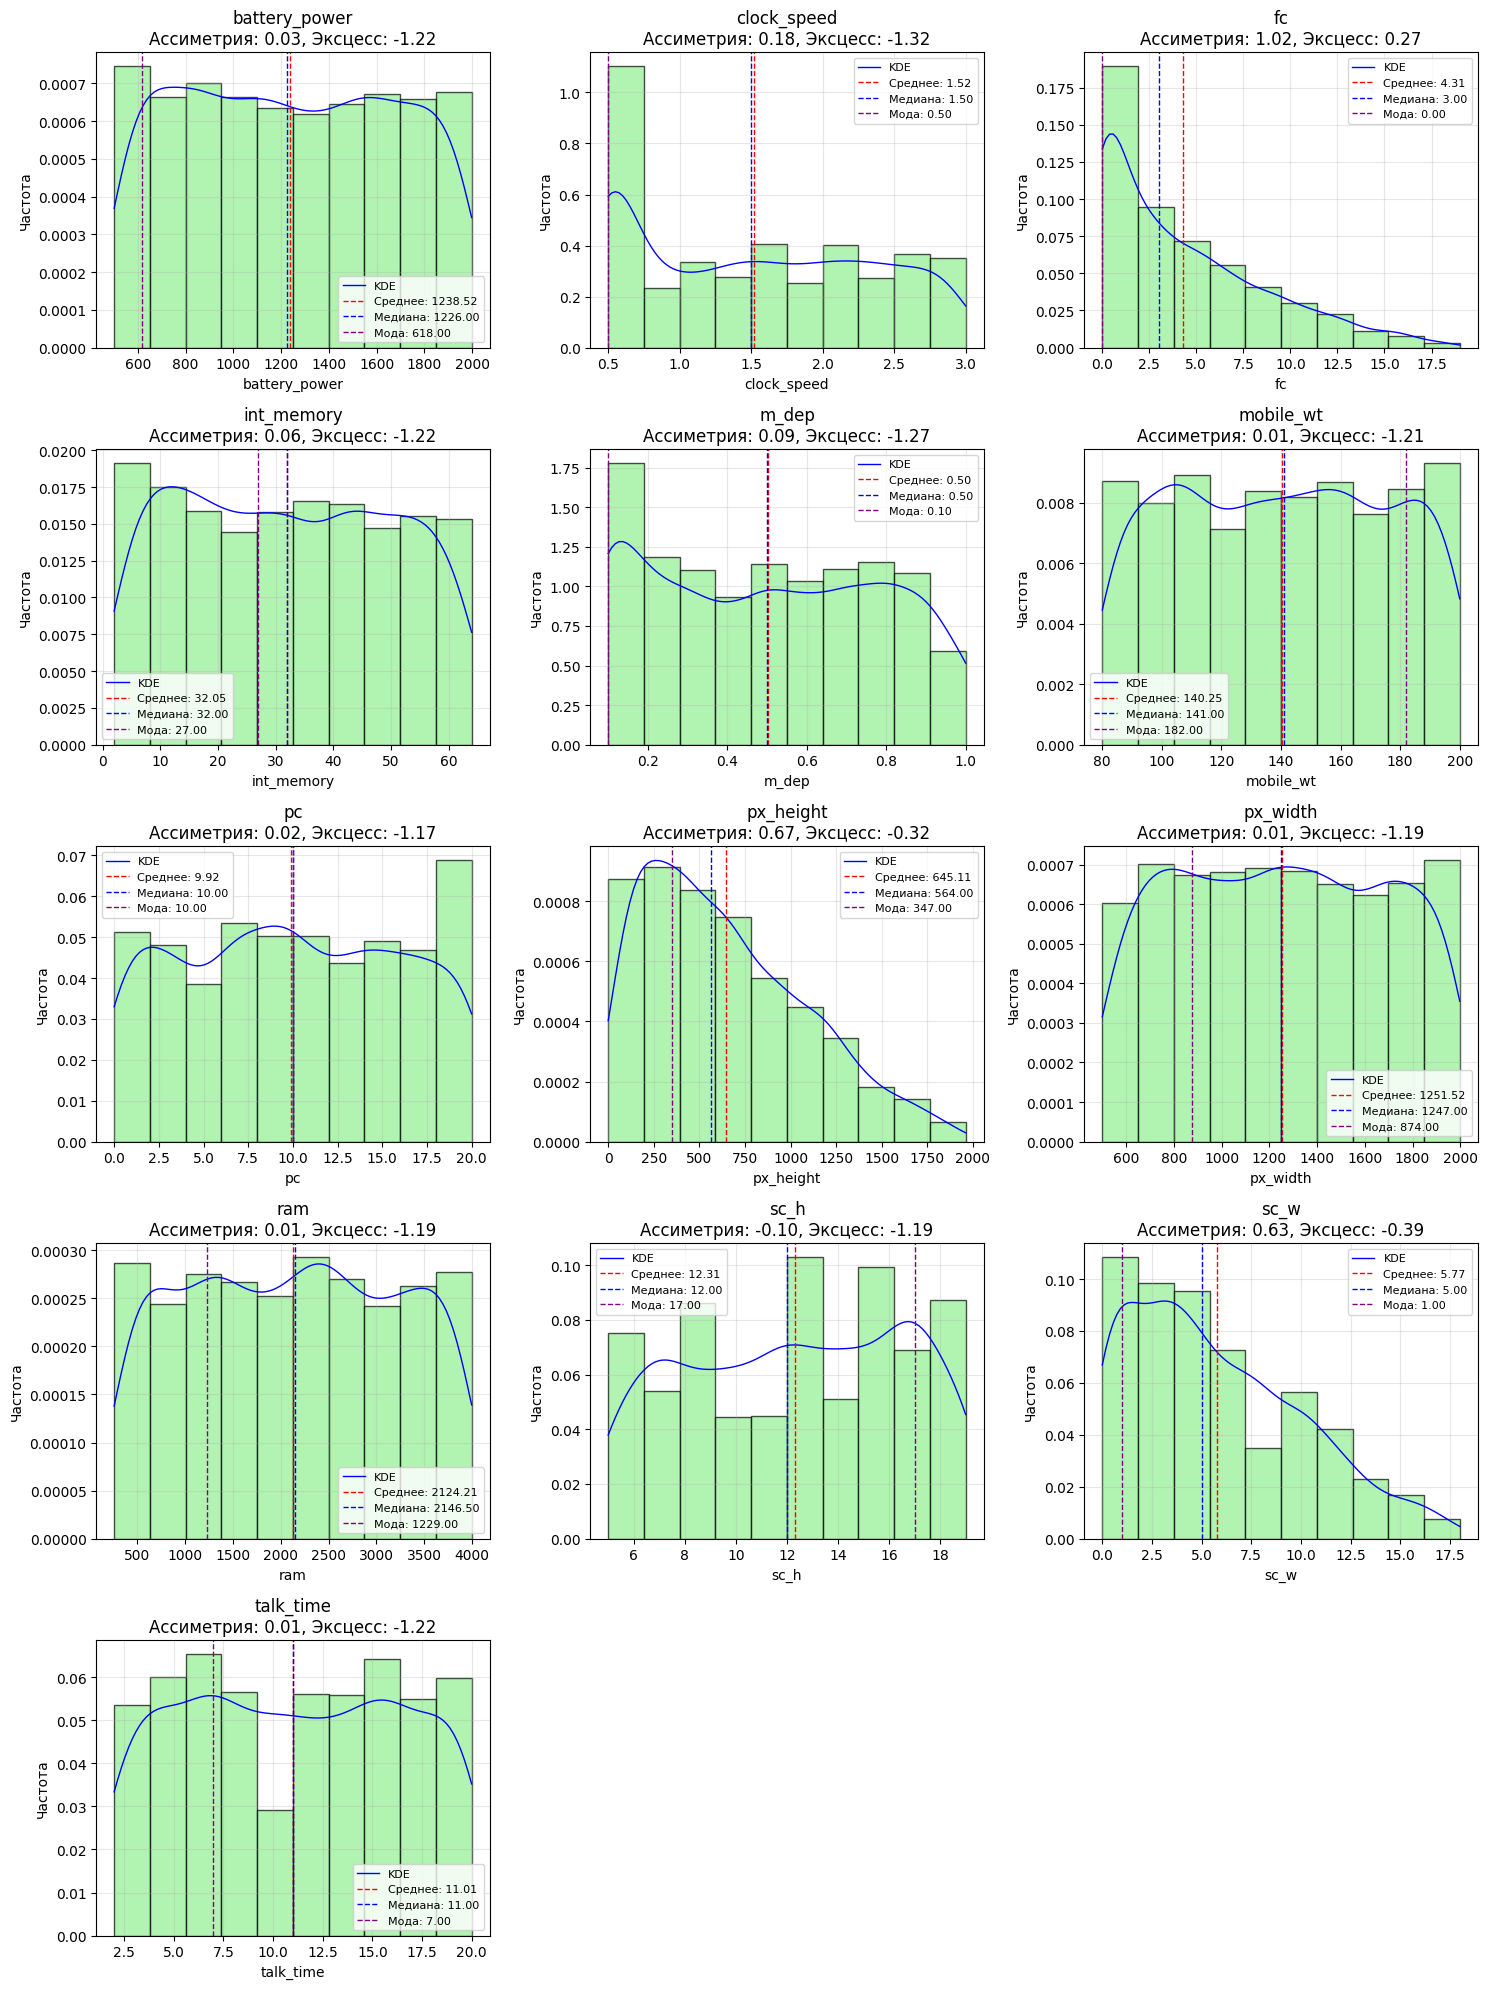

In [68]:
cols = numeric_cols
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
axes = axes.ravel()

for i, col in enumerate(cols):
    data = df_train[col]

    his = axes[i].hist(data, edgecolor='black', density=True, alpha=0.7, color='lightgreen')

    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode()[0]
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)
        
    kde = stats.gaussian_kde(data)
    x_range = np.linspace(data.min(), data.max(), 100)
    kde_curve = kde(x_range)
    axes[i].plot(x_range, kde_curve, 'b-', linewidth=1, label='KDE')
        
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1, label=f'Среднее: {mean_val:.2f}')
    axes[i].axvline(median_val, color='blue', linestyle='--', linewidth=1, label=f'Медиана: {median_val:.2f}')
    axes[i].axvline(mode_val, color='purple', linestyle='--', linewidth=1, label=f'Мода: {mode_val:.2f}')
        
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    axes[i].set_title(f'{col}\nАссиметрия: {skewness:.2f}, Эксцесс: {kurtosis:.2f}')
    axes[i].legend(fontsize=8)
    axes[i].grid(True, alpha=0.3)

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [69]:
scaler = StandardScaler()
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

In [70]:
ds_X = df_train.drop(['price_range'], axis=1)
ds_y = df_train['price_range']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    ds_X, ds_y, test_size=0.2, random_state=42
)

In [72]:
# df_test[numeric_cols] = scaler.fit_transform(df_test[numeric_cols])

In [73]:
# X_test = df_test.drop('id', axis=1)

In [74]:
clf = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=5)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [75]:
y_predicted = clf.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_predicted)
precision_macro = precision_score(y_test, y_predicted, average='macro')
precision_micro = precision_score(y_test, y_predicted, average='micro')
recall_macro = recall_score(y_test, y_predicted, average='macro')
recall_micro = recall_score(y_test, y_predicted, average='micro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro avg): {precision_macro:.4f}")
print(f"Precision (micro avg): {precision_micro:.4f}")
print(f"Recall (macro avg): {recall_macro:.4f}")
print(f"Recall (micro avg): {recall_micro:.4f}")

Accuracy: 0.8000
Precision (macro avg): 0.7998
Precision (micro avg): 0.8000
Recall (macro avg): 0.7953
Recall (micro avg): 0.8000


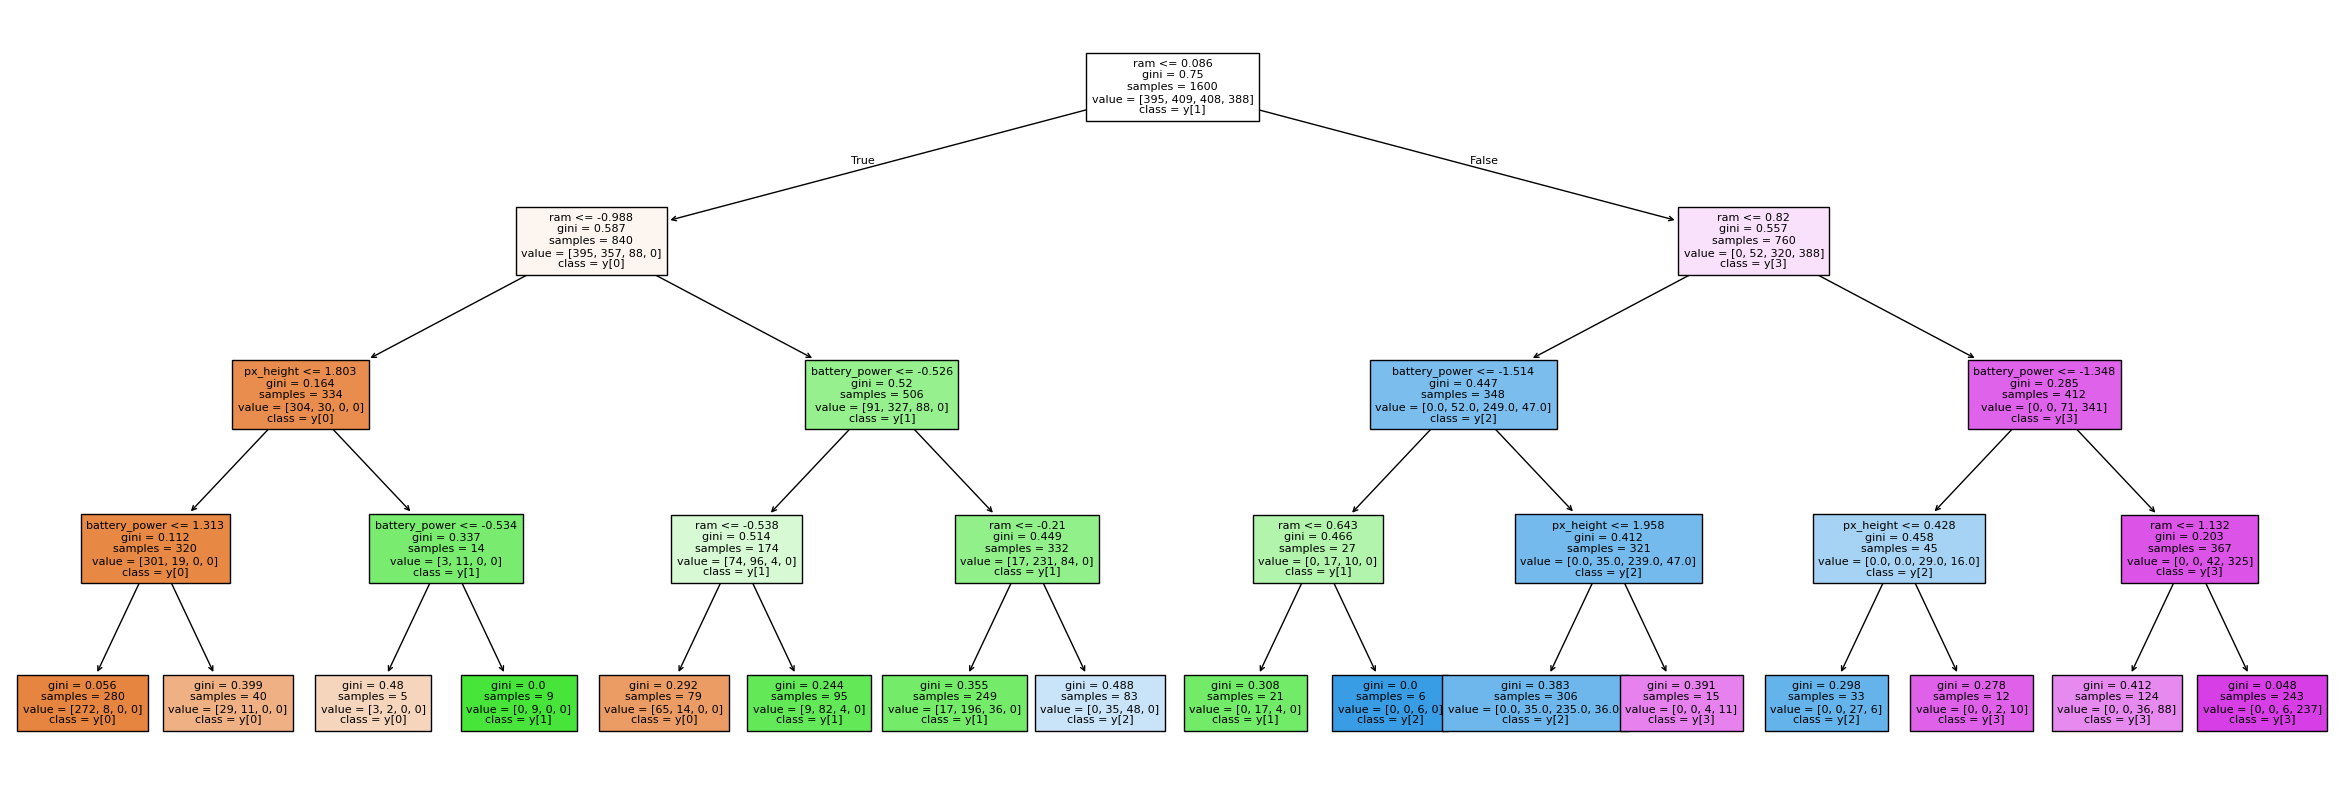

In [77]:
plt.figure(figsize=(30,10))
features = df_train.columns.drop('price_range')
# classes = df_train.columns.drop(features)
plot_tree(clf, feature_names=features, class_names=True, filled=True, fontsize=8)
plt.show()

In [78]:
svc = LinearSVC(loss='squared_hinge', max_iter=10000, random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
#     feature1_name, feature2_name = X.columns[feature_indexes]
#     X_feature_columns = X.values[:, feature_indexes]
#     X_train_feature_columns = X_train[:, feature_indexes]
#     clf.fit(X_train_feature_columns, y_train)

#     plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
#     plt.xlabel(feature1_name)
#     plt.ylabel(feature2_name)
#     plt.title(title)


# decision_boundary_plot(ds_X, ds_y, X_train, y_train, svc, [0, 1, 2, 3], 'Линейный SVC')

In [79]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_macro_svc = precision_score(y_test, y_pred_svc, average='macro')
precision_micro_svc = precision_score(y_test, y_pred_svc, average='micro')
recall_macro_svc = recall_score(y_test, y_pred_svc, average='macro')
recall_micro_svc = recall_score(y_test, y_pred_svc, average='micro')
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision (macro avg): {precision_macro_svc:.4f}")
print(f"Precision (micro avg): {precision_micro_svc:.4f}")
print(f"Recall (macro avg): {recall_macro_svc:.4f}")
print(f"Recall (micro avg): {recall_micro_svc:.4f}")

Accuracy: 0.8750
Precision (macro avg): 0.8637
Precision (micro avg): 0.8750
Recall (macro avg): 0.8633
Recall (micro avg): 0.8750
